<a href="https://colab.research.google.com/github/pedrocacioli8/AulasSirius/blob/main/Clustering_S2D3_Preparando_Dados.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd

In [ ]:
df = pd.read_excel("Fonte dos Dados.xlsx")

In [ ]:
df.head()

,nomeLocalidade,estado,População residente,Densidade demográfica,Porcentagem de Jovens,Porcentagem de Ativos,Porcentagem de Idosos,Taxa de Urbanização,Taxa de Saneamento Básico,Ativos com Baixo Nível Educacional,...,Percentual de empresas do setor terciário em relação ao total,Percentual de trabalhadores do setor primário em relação ao total,Percentual de trabalhadores do setor secundário em relação ao total,Percentual de trabalhadores do setor terciário em relação ao total,Média Salarial,Produtividade,Taxa de desemprego dos jovens,Taxa de desemprego,"Número de trabalhadores(Comerciais, hotéis e restaurantes) por 1,000 habitantes","Número de ativos culturais e de lazer por 10,000 habitantes"
0,Acrelândia,Acre,12538,6.93,52.92,43.04,4.04,48.34,0.00,75.34,...,75.41,8.86,21.53,34.07,994.67,2654247.23,19.17,9.62,12.12,0.0
1,Assis Brasil,Acre,6072,1.22,55.58,40.07,4.35,65.30,2.39,66.83,...,100.00,0.60,0.00,36.25,1163.49,2113108.99,10.57,7.44,17.79,0.0
2,Brasiléia,Acre,21398,5.46,51.88,42.76,5.37,70.02,21.27,70.67,...,83.85,2.53,17.70,33.83,818.65,2376384.22,11.13,5.96,14.58,0.0
3,Bujari,Acre,8471,2.79,52.71,42.60,4.69,44.07,0.16,71.05,...,53.33,31.34,1.04,29.40,897.30,2668575.85,9.76,3.41,5.78,0.0
4,Capixaba,Acre,8798,5.17,53.92,41.92,4.16,44.60,0.82,77.90,...,62.50,4.30,30.37,10.32,843.49,2803488.37,6.35,4.14,7.73,0.0


In [ ]:
df2 = df[["estado", "PIB Municipal", "% de pobres", "IDH", "Média Salarial", "Taxa de desemprego"]]

In [ ]:
df2 = df2.groupby(by="estado").mean()

In [ ]:
df2 = df2.reset_index()
df2.head()

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556


In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

In [ ]:
df_scaled = df2.copy()

In [ ]:
df_scaled.drop("estado", inplace=True, axis=1)

In [ ]:
df_scaled[df_scaled.columns] = scaler.fit_transform(df_scaled)

In [ ]:
df_scaled["estado"] = df2["estado"]
df_scaled.head()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,estado
0,-0.206834,0.924792,-0.702782,-0.328065,-0.606967,Acre
1,-0.211010,1.085804,-1.465417,-0.522383,0.934667,Alagoas
2,-0.201835,0.662013,-0.246939,0.739250,2.380215,Amapá
3,-0.184676,1.530288,-0.738884,3.711683,0.220312,Amazonas
4,-0.207178,0.647259,-0.899338,-0.555597,1.169514,Bahia


In [ ]:
from scipy.cluster.hierarchy import linkage, dendrogram

In [ ]:
distancias = linkage(df_scaled[["Taxa de desemprego", "% de pobres"]],
                     method="ward", metric="euclidean")

In [ ]:
distancias

array([[7.00000000e+00, 1.10000000e+01, 2.79336520e-02, 2.00000000e+00],
       [4.00000000e+00, 2.40000000e+01, 8.74731262e-02, 2.00000000e+00],
       [1.00000000e+01, 2.70000000e+01, 8.80531364e-02, 3.00000000e+00],
       [1.00000000e+00, 2.20000000e+01, 1.10080802e-01, 2.00000000e+00],
       [1.90000000e+01, 2.30000000e+01, 1.65311527e-01, 2.00000000e+00],
       [3.00000000e+00, 9.00000000e+00, 1.85651167e-01, 2.00000000e+00],
       [5.00000000e+00, 1.70000000e+01, 2.16696124e-01, 2.00000000e+00],
       [1.60000000e+01, 1.80000000e+01, 2.59622310e-01, 2.00000000e+00],
       [2.80000000e+01, 3.40000000e+01, 3.23527371e-01, 4.00000000e+00],
       [1.20000000e+01, 2.90000000e+01, 3.25553299e-01, 4.00000000e+00],
       [1.50000000e+01, 3.30000000e+01, 3.47996255e-01, 3.00000000e+00],
       [8.00000000e+00, 3.60000000e+01, 3.56335508e-01, 5.00000000e+00],
       [6.00000000e+00, 2.00000000e+01, 3.67124926e-01, 2.00000000e+00],
       [1.40000000e+01, 3.70000000e+01, 4.62495465e

In [ ]:
import seaborn as sns

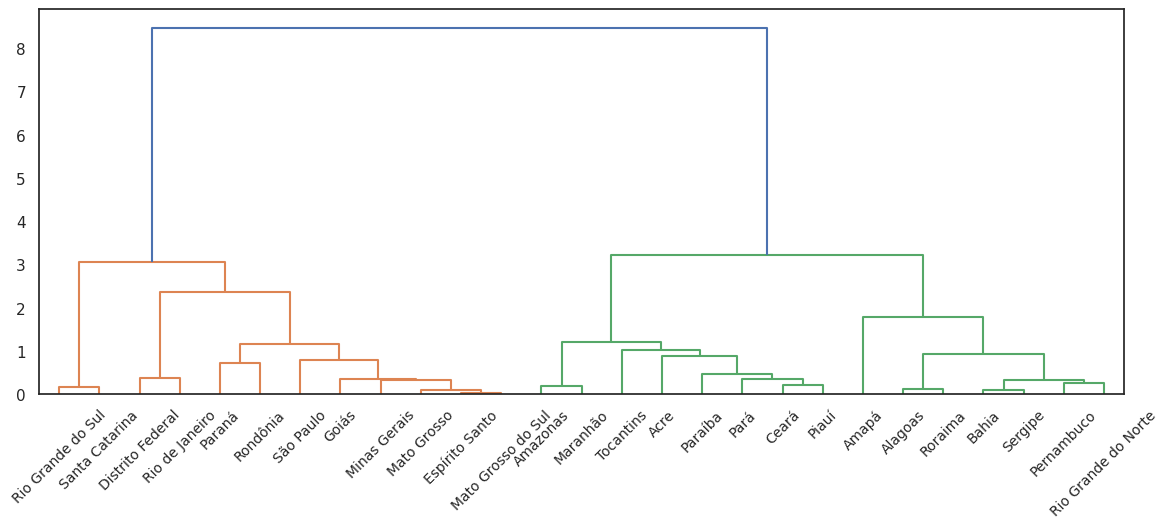

In [ ]:
sns.set(style="white", rc={"figure.figsize":(14,5)})
dn = dendrogram(distancias,
                labels=df_scaled["estado"].values)

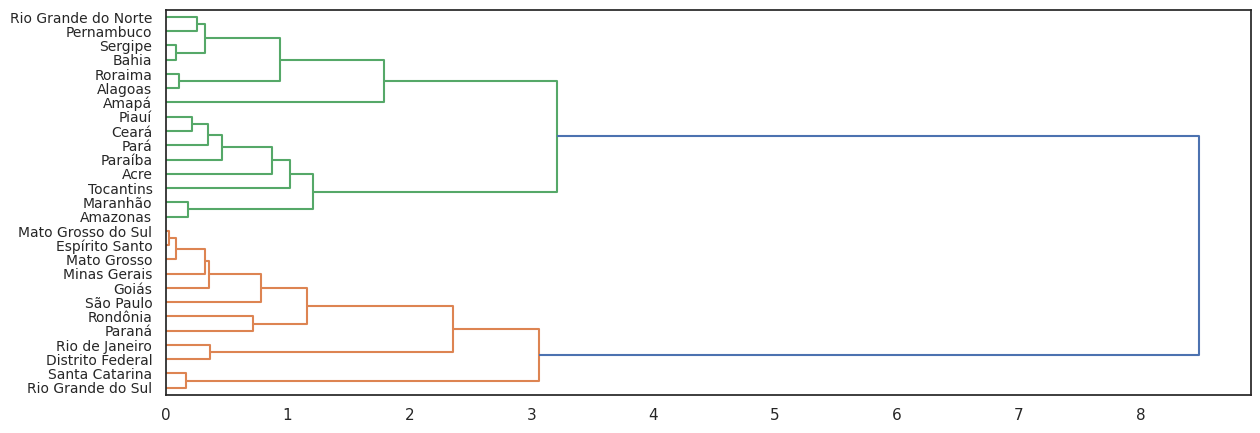

In [ ]:
sns.set(style="white", rc={"figure.figsize":(14,5)})
dn = dendrogram(distancias,
                labels=df_scaled["estado"].values,
                orientation="right")

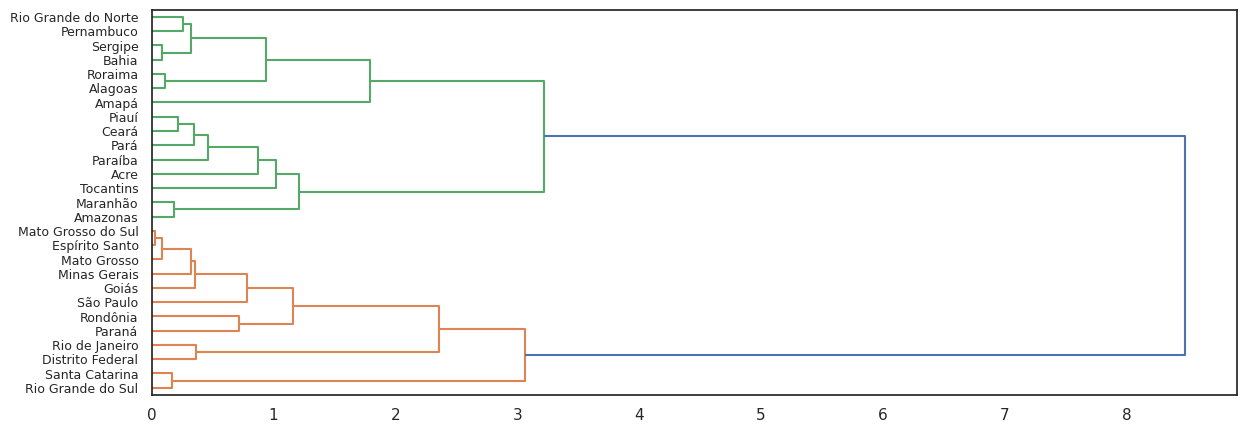

In [ ]:
sns.set(style="white", rc={"figure.figsize":(14,5)})
dn = dendrogram(distancias,
                labels=df_scaled["estado"].values,
                orientation="right",
                leaf_font_size=9)

In [ ]:
from scipy.cluster.hierarchy import fcluster

In [ ]:
max_d = 3
grupos = fcluster(distancias, t= max_d, criterion="distance")
grupos

array([3, 4, 4, 3, 4, 3, 2, 2, 2, 3, 2, 2, 2, 2, 3, 3, 4, 3, 4, 1, 2, 2,
       4, 1, 4, 2, 3], dtype=int32)

In [ ]:
grupos = fcluster(distancias, t= max_d, criterion="maxclust")
grupos

array([2, 3, 3, 2, 3, 2, 1, 1, 1, 2, 1, 1, 1, 1, 2, 2, 3, 2, 3, 1, 1, 1,
       3, 1, 3, 1, 2], dtype=int32)

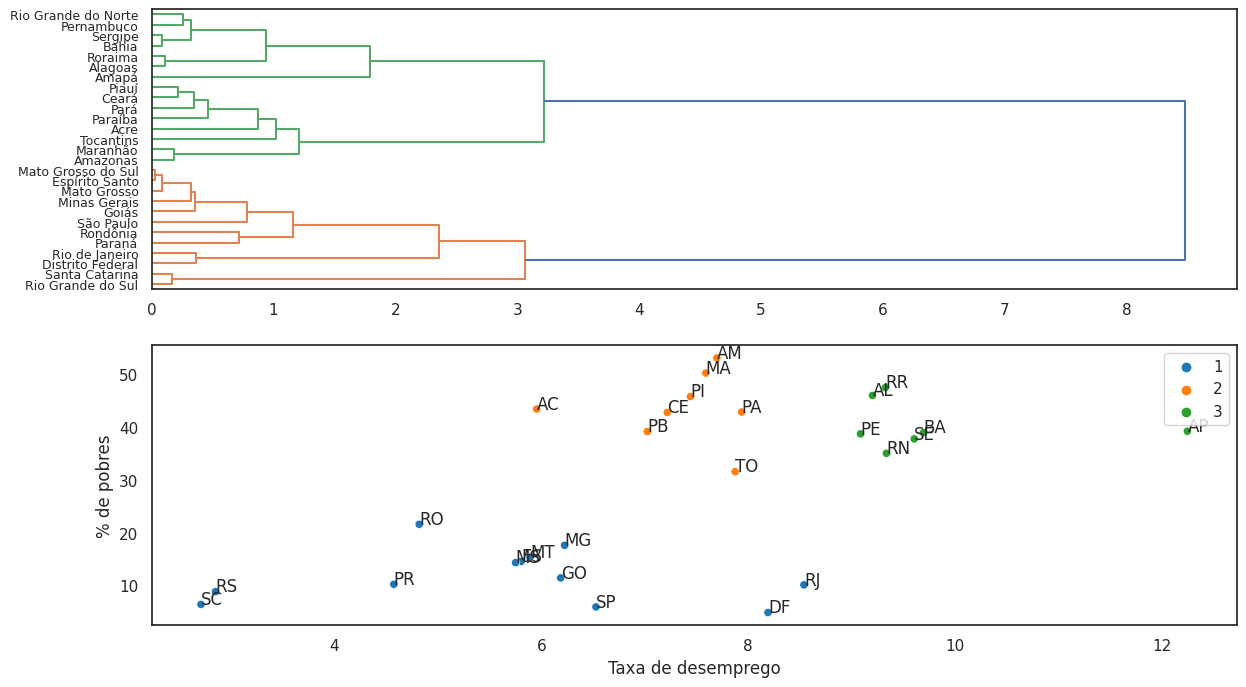

In [ ]:
import matplotlib.pyplot as plt

sns.set(style = "white", rc={"figure.figsize":(14,8)})
fig,axs=plt.subplots(ncols=1, nrows=2)

dn = dendrogram(distancias,
                leaf_rotation=0,
                leaf_font_size=9,
                orientation='right',
                labels=df_scaled['estado'].values,
                ax=axs[0])

# criando o gráfico de dispersão
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres',
                hue=grupos, palette='tab10', ax=axs[1]);

# criando listas que serviram de apoio para anotar a sigla de cada estado no gráfico
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (desemp[i], pobres[i]) );

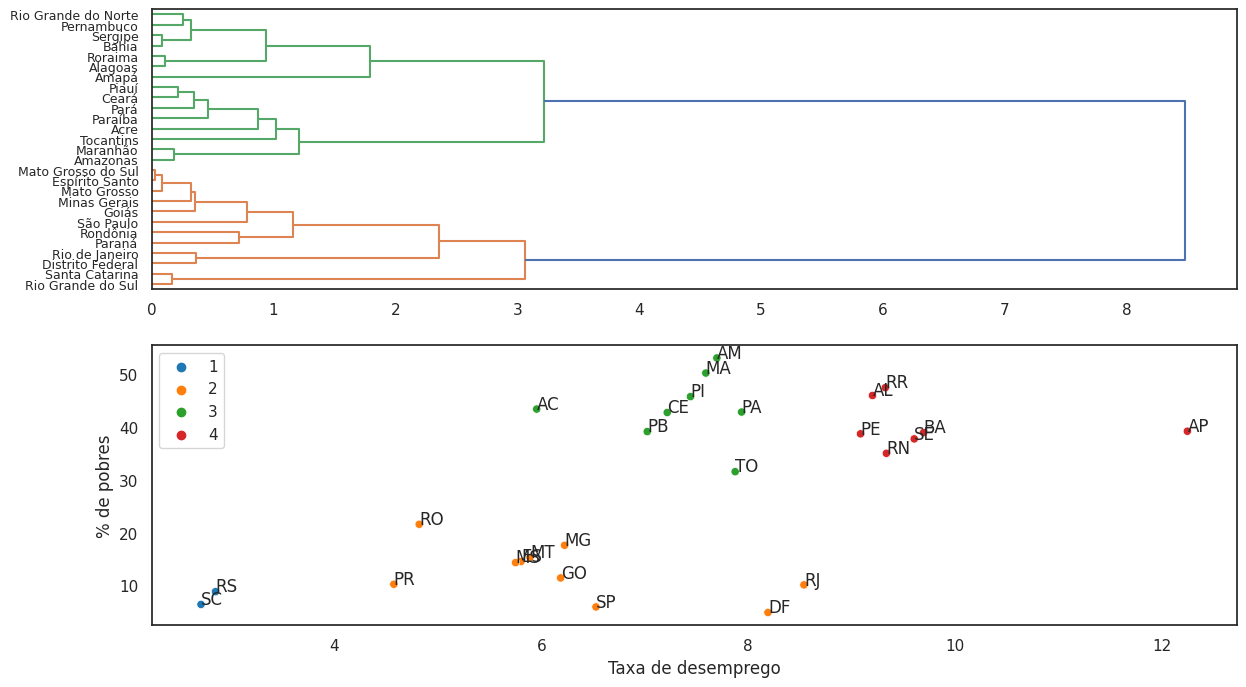

In [ ]:
grupos = fcluster(distancias, t=4, criterion='maxclust')

sns.set(style='white', rc={'figure.figsize':(14,8)})
fig, axs = plt.subplots(ncols=1, nrows=2)

dn = dendrogram(distancias,
                leaf_rotation=0,
                leaf_font_size=9,
                orientation='right',
                labels=df_scaled['estado'].values,
                ax=axs[0])

# criando o gráfico de dispersão
sns.scatterplot(data=df2, x='Taxa de desemprego', y='% de pobres',
                hue=grupos, palette='tab10', ax=axs[1]);

# criando listas que serviram de apoio para anotar a sigla de cada estado no gráfico
desemp = df2['Taxa de desemprego']
pobres = df2['% de pobres']
estados = ['AC','AL','AP','AM','BA','CE','DF','ES','GO','MA','MT','MS','MG',
           'PR','PB','PA','PE','PI','RN','RS','RJ','RO','RR','SC','SE','SP','TO']

# importando a biblioteca matplotlib
import matplotlib.pyplot as plt

# anotando os 'nomes' de cada ponto
for i, estado in enumerate(estados):
    plt.annotate(estado, (desemp[i], pobres[i]) );

In [ ]:
df2["grupos"]=grupos
df2.head()

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000,3
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196,4
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125,4
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452,3
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556,4


In [ ]:
grupo1 = df2[df2["grupos"]==1]
grupo2 = df2[df2["grupos"]==2]
grupo3 = df2[df2["grupos"]==3]
grupo4 = df2[df2["grupos"]==4]

In [ ]:
grupo1

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
19,Rio Grande do Sul,4.863080e+08,8.870565,0.840907,1047.548790,2.851250,1
23,Santa Catarina,5.245580e+08,6.458703,0.847474,1018.796382,2.711126,1


In [ ]:
grupo1.describe()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
count,2.000000e+00,2.000000,2.000000,2.000000,2.000000,2.0
mean,5.054330e+08,7.664634,0.844191,1033.172586,2.781188,1.0
std,2.704688e+07,1.705444,0.004644,20.331023,0.099082,0.0
min,4.863080e+08,6.458703,0.840907,1018.796382,2.711126,1.0
25%,4.958705e+08,7.061668,0.842549,1025.984484,2.746157,1.0
50%,5.054330e+08,7.664634,0.844191,1033.172586,2.781188,1.0
75%,5.149955e+08,8.267599,0.845833,1040.360688,2.816219,1.0
max,5.245580e+08,8.870565,0.847474,1047.548790,2.851250,1.0


In [ ]:
grupo1_lista = ["75% possui menos de 5.1e+08",
              "75% possui menos de 8.3%",
              "75% possui mais de 2.8"]

In [ ]:
grupo1_lista

['75% possui menos de 5.1e+08',
 '75% possui menos de 8.3%',
 '75% possui mais de 2.8']

In [ ]:
grupo2.describe()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
count,1.000000e+01,10.000000,10.000000,10.000000,10.000000,10.0
mean,1.554446e+10,12.627916,0.824875,1077.867456,6.250555,2.0
std,4.535742e+10,5.119319,0.020049,280.345652,1.269751,0.0
min,4.015928e+08,4.930000,0.788654,850.788253,4.574436,2.0
25%,4.406404e+08,10.184277,0.818793,937.869303,5.763974,2.0
50%,5.854940e+08,12.913940,0.823013,988.586537,6.038288,2.0
75%,1.779841e+09,15.131804,0.825993,1084.958528,6.452164,2.0
max,1.445732e+11,21.599231,0.870000,1814.710000,8.537717,2.0


In [ ]:
grupo2_lista = ["75% possui menos de 1.7e+09",
              "75% possui menos de 10%",
              "75% possui mais de 5.8"]

In [ ]:
grupo3.describe()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
count,8.000000e+00,8.000000,8.000000,8.000000,8.000000,8.0
mean,3.690005e+08,43.556752,0.763382,1021.862537,7.341265,3.0
std,3.002107e+08,6.584739,0.015130,438.376759,0.640475,0.0
min,9.940348e+07,31.538705,0.740876,780.787609,5.955000,3.0
25%,1.422501e+08,41.812808,0.754843,833.727375,7.168266,3.0
50%,2.966414e+08,43.087867,0.763799,870.014614,7.515262,3.0
75%,4.679759e+08,46.833433,0.769073,939.720752,7.740576,3.0
max,9.820415e+08,53.020161,0.790288,2097.015484,7.935175,3.0


In [ ]:
grupo3_lista = ["75% possui menos de 4.7e+08",
              "75% possui menos de 41.8%",
              "75% possui mais de 7.2"]

In [ ]:
grupo4.describe()

,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
count,7.000000e+00,7.000000,7.000000,7.000000,7.000000,7.0
mean,3.840045e+08,40.416165,0.765439,953.504894,9.783503,4.0
std,1.181913e+08,4.520156,0.019592,148.525040,1.105412,0.0
min,2.166574e+08,35.010299,0.739706,819.038054,9.084432,4.0
25%,3.090474e+08,38.211303,0.756243,858.062473,9.262098,4.0
50%,3.701926e+08,38.945468,0.760168,874.946373,9.334611,4.0
75%,4.788124e+08,42.558058,0.773522,1012.668067,9.649078,4.0
max,5.254619e+08,47.418667,0.798667,1239.088750,12.243125,4.0


In [ ]:
grupo4_lista = ["75% possui menos de 3e+08",
              "75% possui mais de 38%",
              "75% possui menos de 9.6"]

In [ ]:
dicio_grupos = {"grupo 1": grupo1_lista,
                "grupo2": grupo2_lista,
                "grupo3": grupo3_lista,
                "grupo4": grupo4_lista}

In [ ]:
dicio_grupos

{'grupo 1': ['75% possui menos de 5.1e+08',
  '75% possui menos de 8.3%',
  '75% possui mais de 2.8'],
 'grupo2': ['75% possui menos de 1.7e+09',
  '75% possui menos de 10%',
  '75% possui mais de 5.8'],
 'grupo3': ['75% possui menos de 4.7e+08',
  '75% possui menos de 41.8%',
  '75% possui mais de 7.2'],
 'grupo4': ['75% possui menos de 3e+08',
  '75% possui mais de 38%',
  '75% possui menos de 9.6']}

In [ ]:
personas = pd.DataFrame(dicio_grupos)
personas

,grupo 1,grupo2,grupo3,grupo4
0,75% possui menos de 5.1e+08,75% possui menos de 1.7e+09,75% possui menos de 4.7e+08,75% possui menos de 3e+08
1,75% possui menos de 8.3%,75% possui menos de 10%,75% possui menos de 41.8%,75% possui mais de 38%
2,75% possui mais de 2.8,75% possui mais de 5.8,75% possui mais de 7.2,75% possui menos de 9.6


In [ ]:
personas = pd.DataFrame(dicio_grupos, index=["PIB Municipal", "% de pobres", "Taxa de Desemprego"])
personas


,grupo 1,grupo2,grupo3,grupo4
PIB Municipal,75% possui menos de 5.1e+08,75% possui menos de 1.7e+09,75% possui menos de 4.7e+08,75% possui menos de 3e+08
% de pobres,75% possui menos de 8.3%,75% possui menos de 10%,75% possui menos de 41.8%,75% possui mais de 38%
Taxa de Desemprego,75% possui mais de 2.8,75% possui mais de 5.8,75% possui mais de 7.2,75% possui menos de 9.6


In [ ]:
sns.set(style="white", rc={"figure.figsize":(14,5)})

<Axes: xlabel='grupos', ylabel='PIB Municipal'>

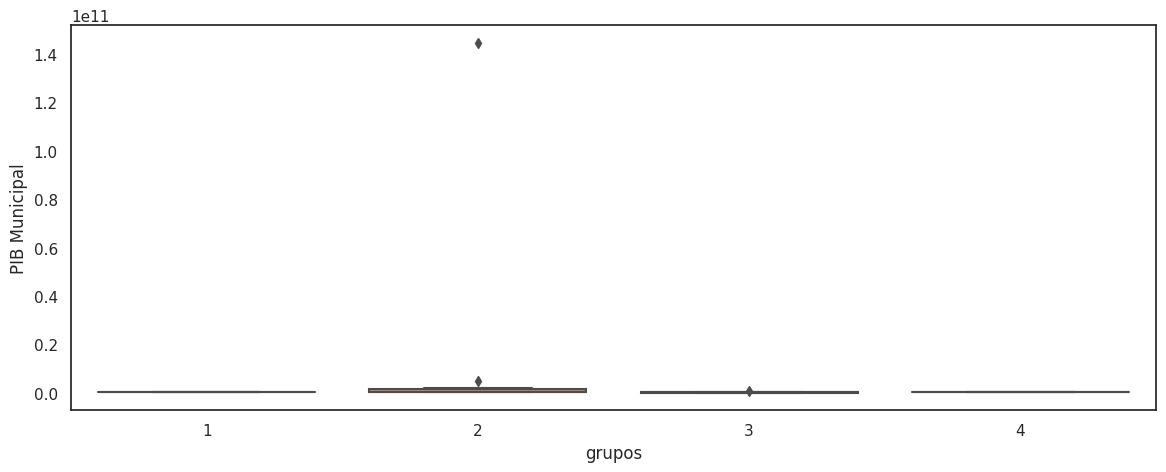

In [ ]:
sns.boxplot(data=df2, x="grupos", y="PIB Municipal")

In [ ]:
df2

,estado,PIB Municipal,% de pobres,IDH,Média Salarial,Taxa de desemprego,grupos
0,Acre,3.795693e+08,43.369091,0.767273,931.031818,5.955000,3
1,Alagoas,2.660082e+08,45.935490,0.739706,874.946373,9.200196,4
2,Amapá,5.154880e+08,39.180625,0.783750,1239.088750,12.243125,4
3,Amazonas,9.820415e+08,53.020161,0.765968,2097.015484,7.696452,3
4,Bahia,3.701926e+08,38.945468,0.760168,865.359856,9.694556,4
5,Ceará,4.314891e+08,42.712772,0.761630,780.787609,7.216522,3
6,Distrito Federal,1.445732e+11,4.930000,0.870000,1814.710000,8.190000,2
7,Espírito Santo,1.095770e+09,14.555513,0.826026,932.606923,5.803590,2
8,Goiás,4.339869e+08,11.468008,0.825894,977.789228,6.186789,2
9,Maranhão,2.137135e+08,50.173733,0.740876,822.918157,7.589631,3


In [ ]:
df2.drop([6], axis=0, inplace=True)

<Axes: xlabel='grupos', ylabel='PIB Municipal'>

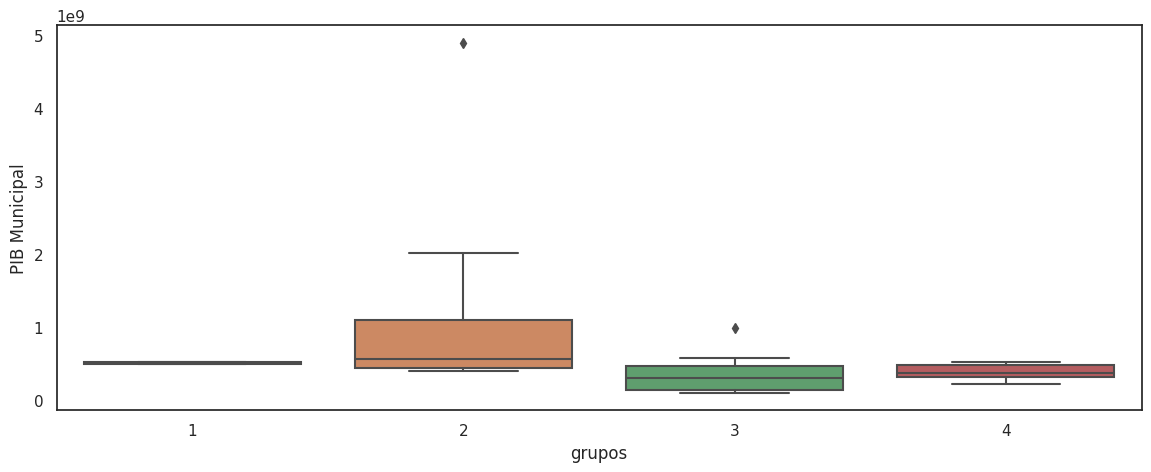

In [ ]:
sns.boxplot(data=df2, x="grupos", y="PIB Municipal")

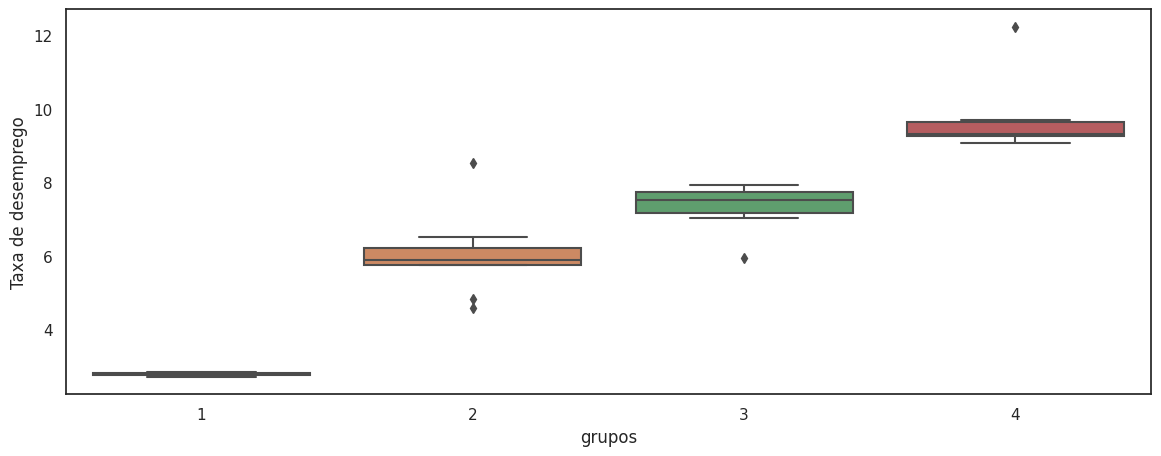

In [ ]:
sns.boxplot(data=df2, x="grupos", y="Taxa de desemprego");

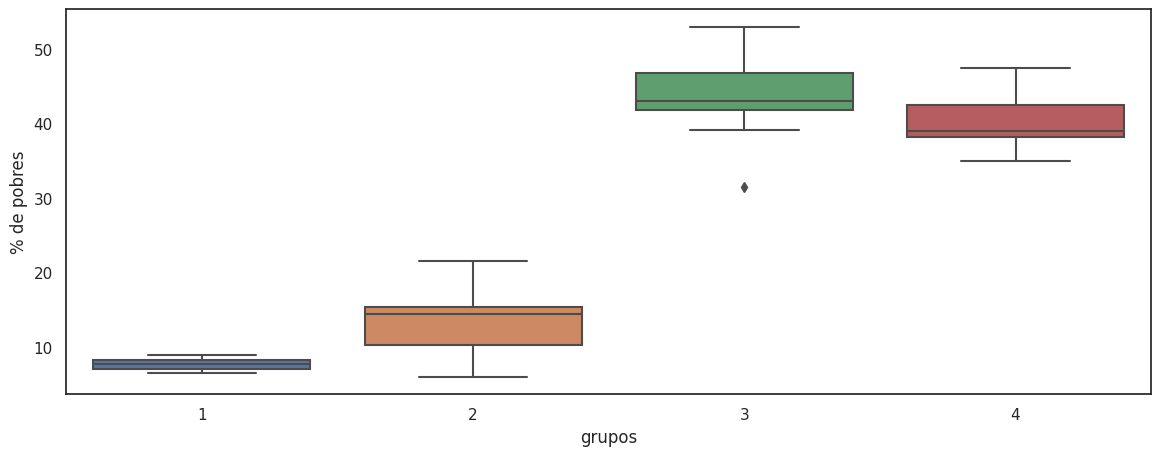

In [ ]:
sns.boxplot(data=df2, x="grupos", y="% de pobres");